### Apartado 2

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

2. Cargamos el fichero CaernoElegans-LC_uw.txt

In [4]:
G_CE = nx.read_edgelist("CaernoElegans-LC_uw.txt")

3. Imprimid el orden, el tamaño y ver si es dirigido o no

In [7]:
## Orden y tamaño
tam =  nx.number_of_edges(G_CE)
orden = nx.number_of_nodes(G_CE)
print ("Tamaño: " , tam)

print ("Orden: ", orden )

Tamaño:  1648
Orden:  1387


In [ ]:
##  Vemos si es dirigido buscando la rama inversa en el conjunto de ramas
for i in nx.edges(G_CE):
    # print (i, i[::-1]) 
    if i[::-1] in nx.edges(G_CE):
        print ("Bien", i, i[::-1])
        break
        
print (('AC3.4', 'AC3.3') in nx.edges(G_CE))
print(('AC3.3', 'AC3.4') in nx.edges(G_CE))

Dispersión del grafo

$$ D =\frac{2|E|}{|V|(|V|-1)}$$

* No es esta* 
$$ D = \frac{|E|}{|V|} $$ 

Donde:
* $|E|$ es el número de ramas. 
* $|V|$ es el número de nodos 

In [9]:
densidad = (2*tam)/(orden*(orden-1))
print(densidad)

densidad2 = nx.density(G_CE)
print(densidad2)

densidad == densidad2

0.001714539566017576
0.001714539566017576


True

Al ser muy cercano a 0 podemos asegurar que se trata de un grafo disperso. 
Es bueno que sea disperso para que los algoritmos vayan rápido y las redes biologicas son dispersos. Si fuera denso sería como un grafo completo y no sería tan interesante de estudiar

4. Cread un grafo aleatorio

In [11]:
G_AL = nx.gnm_random_graph(orden, tam) 

## 5. Indica si ambos son conexos

In [14]:
print("¿Es conexo el grafo aleatorio?: ", nx.is_connected(G_AL), "\n"
      "¿Es conecxo el grafo inicial?: ", nx.is_connected(G_CE))

¿Es conexo el grafo aleatorio?:  False 
¿Es conecxo el grafo inicial?:  False


In [25]:
import operator
degree_dic = dict(G_CE.degree())
max(degree_dic.items(), key=operator.itemgetter(1))

('T08G11.5', 131)

In [35]:
degree_dic = dict(G_CE.degree())
max(degree_dic.items(), key = lambda k: k[1])

('T08G11.5', 131)

La proteína con mayor grado es muy importante porque esa proteína afectará a muchas otras proteínas es un punto débil. 

## 6. Camino más largo

Como el grafo es no conexo el diámetro es $\infty$

In [34]:
nx.diameter(G_CE)

NetworkXError: Found infinite path length because the graph is not connected

# Apartado 3

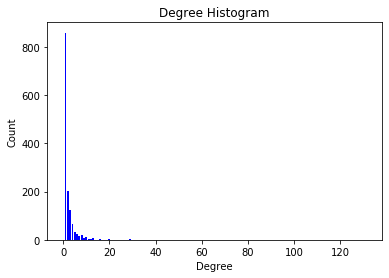

In [42]:
import matplotlib.pyplot as plt

L=nx.degree_histogram(G_CE)
plt.bar(range(len(L)),L, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

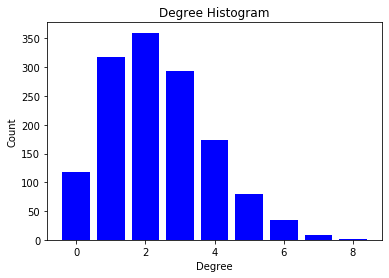

In [43]:
L=nx.degree_histogram(G_AL)
plt.bar(range(len(L)),L, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

Explicación: Vemos que no siguen la misma distribución. En el caso de la red inicial vemos que hay nodos con un grado alto que en el caso del histograma del grafo aleatorio no se observa. Este comportamiento demuestra que nuestro grafo inicial no se comporta como un grafo aleatorio.   